#Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
import math

import warnings
warnings.simplefilter(action='ignore', category=Warning)

sns.set_palette(palette='icefire')

In [2]:
df = pd.read_csv('datasets/diabetic_data.csv')

In [3]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [4]:
df.shape

(101766, 50)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


### Creating Unique Values Dataframe

In [6]:
# create dataframe which contains unique values of all columns and it's count
def uniqueValueDataFrame(df):
    col_name = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    for col in df.columns:
        col_name.append(col)
        unique_value_list.append(df[col].unique())
        total_unique_value.append(len(df[col].unique()))
        data_type.append(df[col].dtype)
    
    data = pd.DataFrame({"col":col_name, "unique values":unique_value_list, "unique count":total_unique_value, "data type":data_type})
    
    data = data.set_index("col")
    return data.sort_values("unique count",ascending=False)


unique_data = uniqueValueDataFrame(df)

In [7]:
from pandas import option_context

with option_context('display.max_colwidth', 200):
    display(unique_data)

,unique values,unique count,data type
col,,,
encounter_id,"[2278392, 149190, 64410, 500364, 16680, 35754, 55842, 63768, 12522, 15738, 28236, 36900, 40926, 42570, 62256, 73578, 77076, 84222, 89682, 148530, 150006, 150048, 182796, 183930, 216156, 221634, 23...",101766,int64
patient_nbr,"[8222157, 55629189, 86047875, 82442376, 42519267, 82637451, 84259809, 114882984, 48330783, 63555939, 89869032, 77391171, 85504905, 77586282, 49726791, 86328819, 92519352, 108662661, 107389323, 694...",71518,int64
diag_3,"[?, 255, V27, 403, 250, V45, 38, 486, 996, 197, 250.6, 427, 627, 414, 416, 714, 428, 582, V43, 250.01, 263, 250.42, 276, 482, 401, 250.41, 585, 781, 278, 998, 568, 682, 618, 250.02, 305, 707, 496,...",790,object
diag_2,"[?, 250.01, 250, 250.43, 157, 411, 492, 427, 198, 403, 288, 998, 507, 174, 425, 456, 401, 715, 496, 428, 585, 250.02, 410, 999, 996, 135, 244, 41, 571, 276, 997, 599, 424, 491, 553, 707, 286, 440,...",749,object
diag_1,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434, 250.7, 157, 518, 999, 410, 682, 402, 737, 572, V57, 189, 786, 427, 996, 277, 584, 462, 473, 411, 174, 486, 998, 511, 432, 626, 295, 196, 250.6, 618, ...",717,object
num_lab_procedures,"[41, 59, 11, 44, 51, 31, 70, 73, 68, 33, 47, 62, 60, 55, 49, 75, 45, 29, 35, 42, 66, 36, 19, 64, 25, 53, 52, 87, 27, 37, 46, 28, 48, 72, 10, 2, 65, 67, 40, 54, 58, 57, 43, 32, 83, 34, 39, 69, 38, ...",118,int64
num_medications,"[1, 18, 13, 16, 8, 21, 12, 28, 17, 11, 15, 31, 2, 23, 19, 7, 20, 14, 10, 22, 9, 27, 25, 4, 32, 6, 30, 26, 24, 33, 5, 39, 3, 29, 61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49, ...",75,int64
medical_specialty,"[Pediatrics-Endocrinology, ?, InternalMedicine, Family/GeneralPractice, Cardiology, Surgery-General, Orthopedics, Gastroenterology, Surgery-Cardiovascular/Thoracic, Nephrology, Orthopedics-Reconst...",73,object
number_outpatient,"[0, 2, 1, 5, 7, 9, 3, 8, 4, 12, 11, 6, 20, 15, 10, 13, 14, 16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25, 23, 28, 37, 38, 40]",39,int64


#### Observations and next steps
___
    - citoglipton, examide are Categorical columns with just one category 'No' so we will drop these columuns as they wont be adding any value to the prediction.
    - encounter_id and patient_nbr are just ID's of the record and patient respectively so we will drop those as well.
    - gender has 3 category which needs to be fixed.
    - target variable readmitted has 3 values which need to be converted into 0 and 1.

### Dealing with Missing Values

In [8]:
df.isnull().values.any()

False

#### Observation
___
    - In the dataset missing values are represented as '?' sign and not as 'NaN' beacause of which it says that we dont have any missing values.

_Let's check for the missing values_

In [9]:
df.replace('?', np.nan , inplace=True)

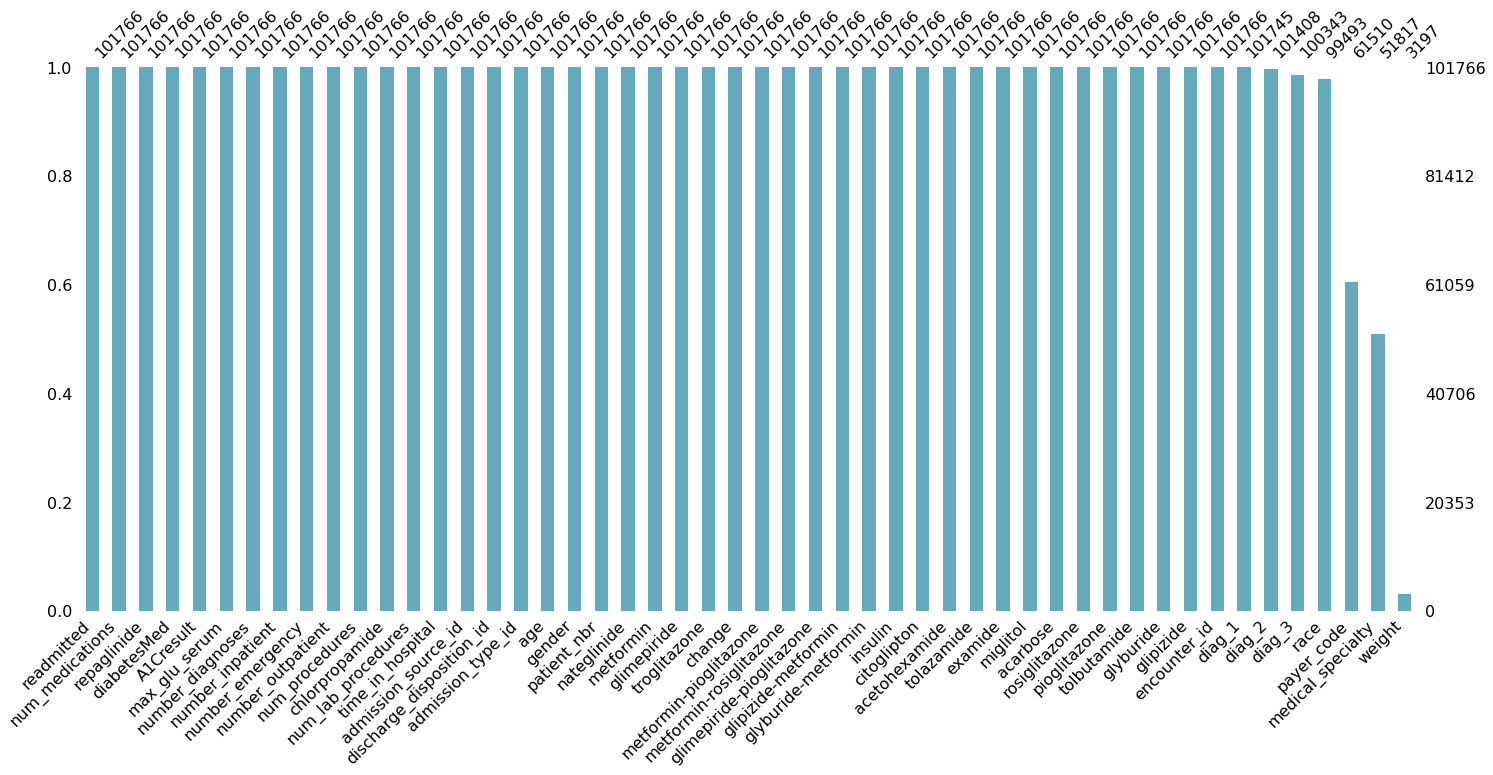

In [10]:
msno.bar(df,sort='descending',color='#66a9bc')
plt.show()

#### Observation and next steps
___
    - We cannot just update missing values with mean or median which has almost more than half of the values missing.
    - Need to drop all the unnecessary columns.

In [11]:
drop_na_list = ['examide' ,'citoglipton','weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
df.drop(columns=drop_na_list, axis=1, inplace=True)

### Investigating and Visualizing Data

---

**_Target Distribution_**

_as we are checking if the patient was readmitted within 30 days we will update values with >30 as 0 as the patient was not admitted before 30 days_

In [12]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [13]:
df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]

<AxesSubplot:xlabel='readmitted', ylabel='count'>

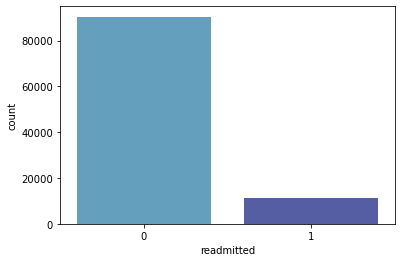

In [14]:
sns.countplot(data=df, x='readmitted')

In [62]:
df.readmitted.value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

_There is clearly a class imbalace problem._

**_Fixing 3 categories in gender_**

In [15]:
df.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [16]:
df.gender.replace('Unknown/Invalid', np.nan , inplace=True)
df.dropna(subset=['gender'], how='all', inplace = True)

<AxesSubplot:xlabel='gender', ylabel='count'>

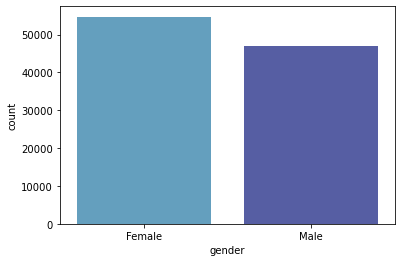

In [17]:
sns.countplot(data=df, x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

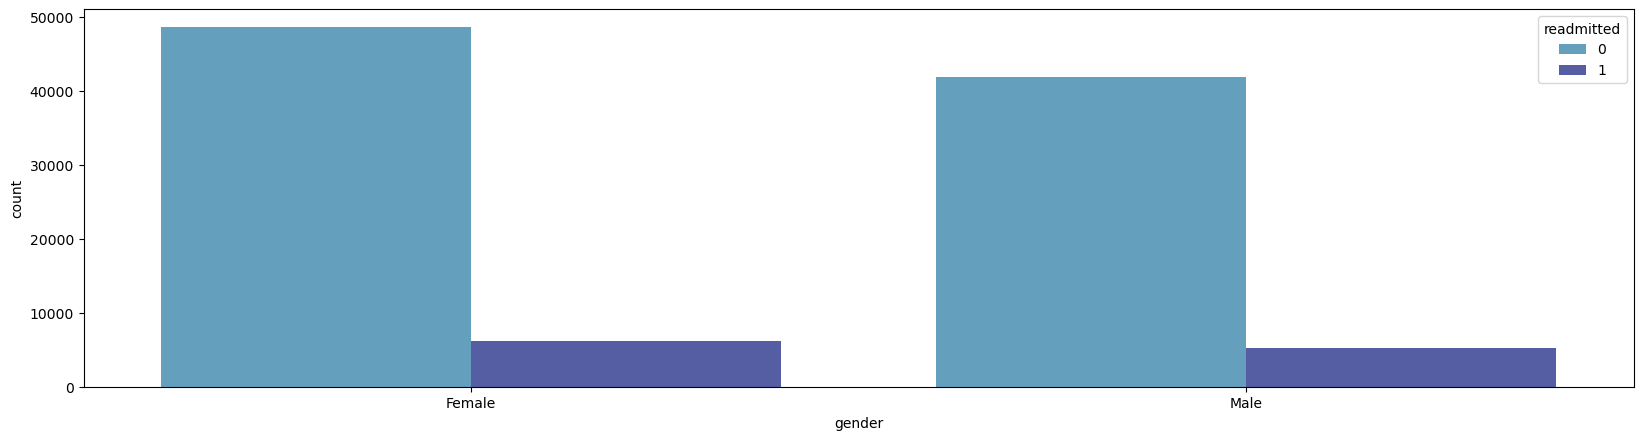

In [18]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['gender'], hue=df.readmitted)

In [19]:
df['gender'] = df['gender'].replace(['Female','Male'],[0,1]).astype(int)

**_Dealing with Race variable_**


In [20]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

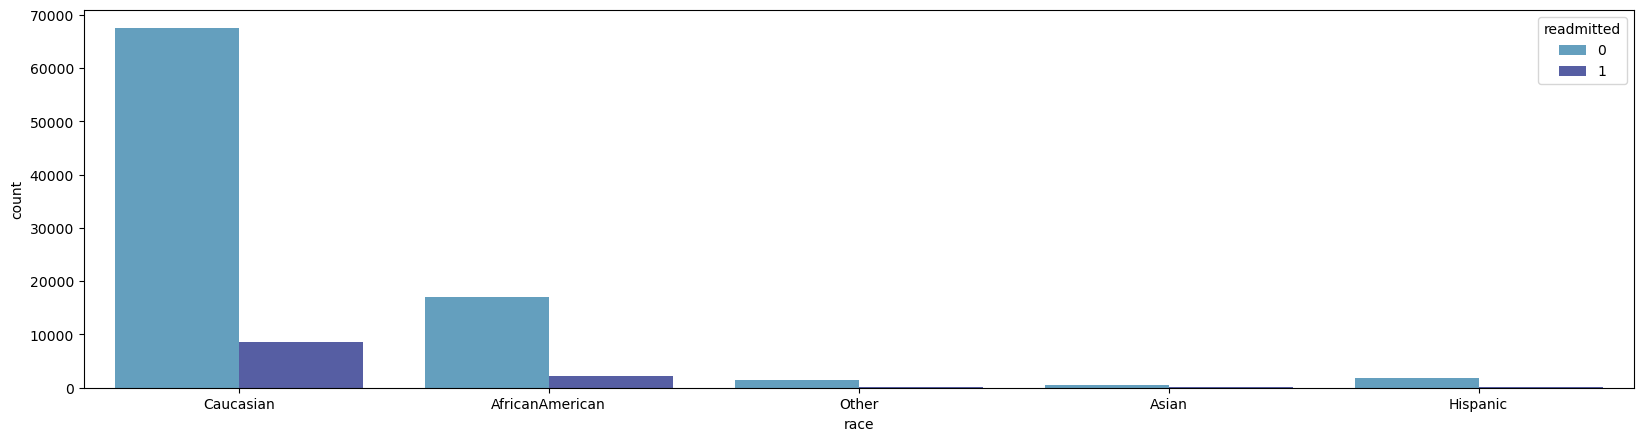

In [21]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['race'], hue=df.readmitted)

### Age Vs Readmission

<AxesSubplot:xlabel='age', ylabel='count'>

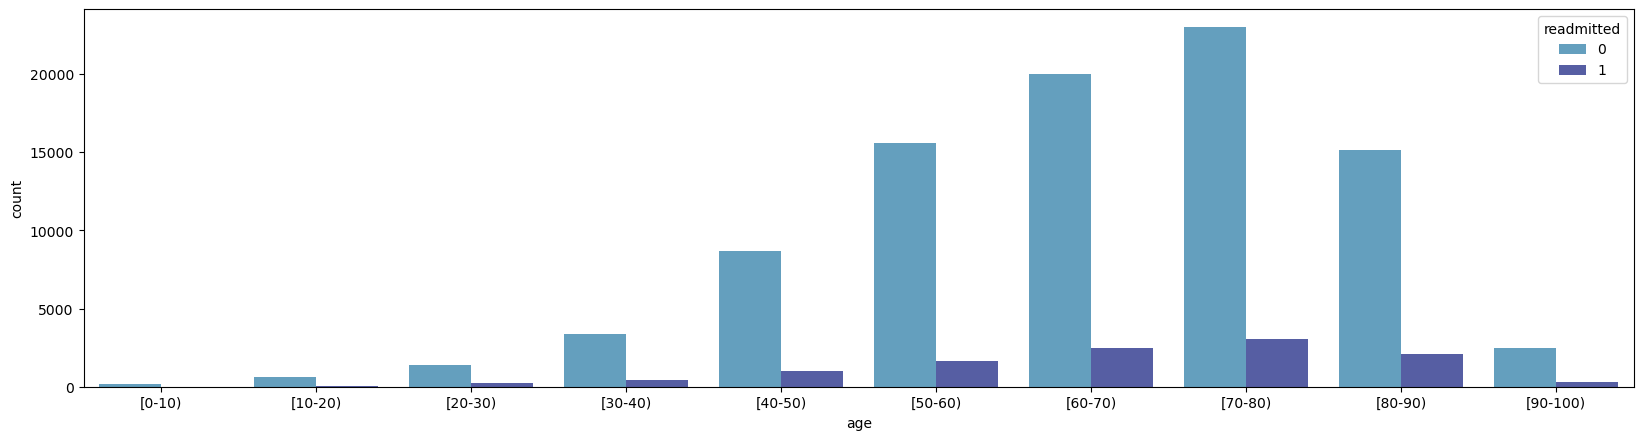

In [22]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['age'], hue=df.readmitted)

<Figure size 2000x500 with 0 Axes>

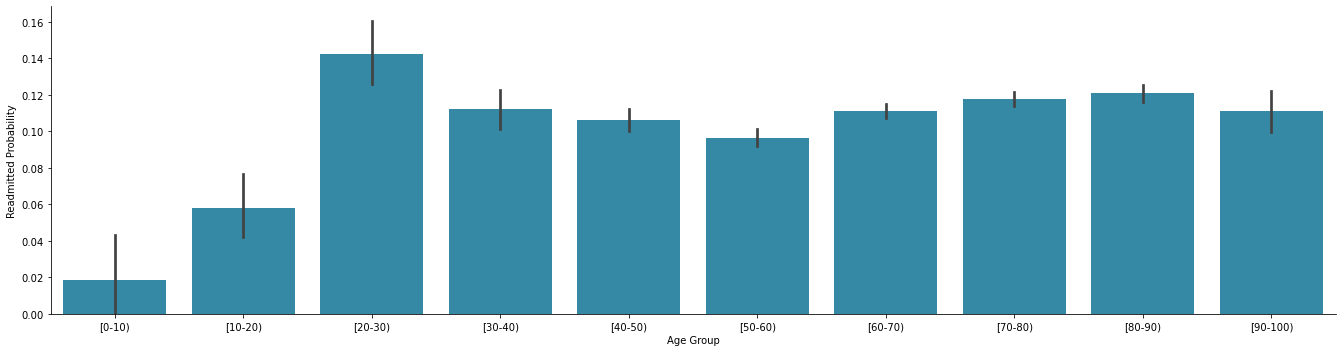

In [23]:
plt.figure(figsize=(20,5),dpi=100)
age_prob = sns.catplot(x = "age", y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
age_prob.set_ylabels("Readmitted Probability")
age_prob.set_xlabels("Age Group")
plt.tight_layout()

**_Dealing With Diagnosis 1/2/3_**

In [24]:
def transformCategory(value):
    
    if ('V' in value) or ('E' in value):
        category = 'Other'
    else:
        value = float(value)
        if (value >= 390) and (value <= 459) or (value == 785):
            category = 'Circulatory'
        elif (value >= 460) and (value <= 519) or (value == 786):
            category = 'Respiratory'
        elif (value >= 520) and (value <= 579) or (value == 787):
            category = 'Digestive'
        elif (value >= 250) and (value< 251):
            category = 'Injury' 
        elif (value >= 800) and (value <= 999):
            category = 'Musculoskeletal'
        elif (value >= 710) and (value <= 739):
            category = 'Genitourinary'
        elif (value >= 580) and (value <= 629) or (value == 788):
            category = 'Neoplasms'    
        elif (value >= 140) and (value <= 239) :
            category = 'Diabetes'
        else :
            category = 'Other'

    return category

# {1:'Other', 2:'Circulatory', 3:'Respiratory', 4:'Digestive', 5:'Injury', 6:'Musculoskeletal', 7:'Genitourinary', 8:'Neoplasms', 9:'Diabetes'}

In [25]:
diag = ['diag_1','diag_2','diag_3']
for d in diag:
    df[diag] = df[diag].fillna('0')

In [26]:
for col in diag:
    df[col] = df[col].apply(transformCategory)

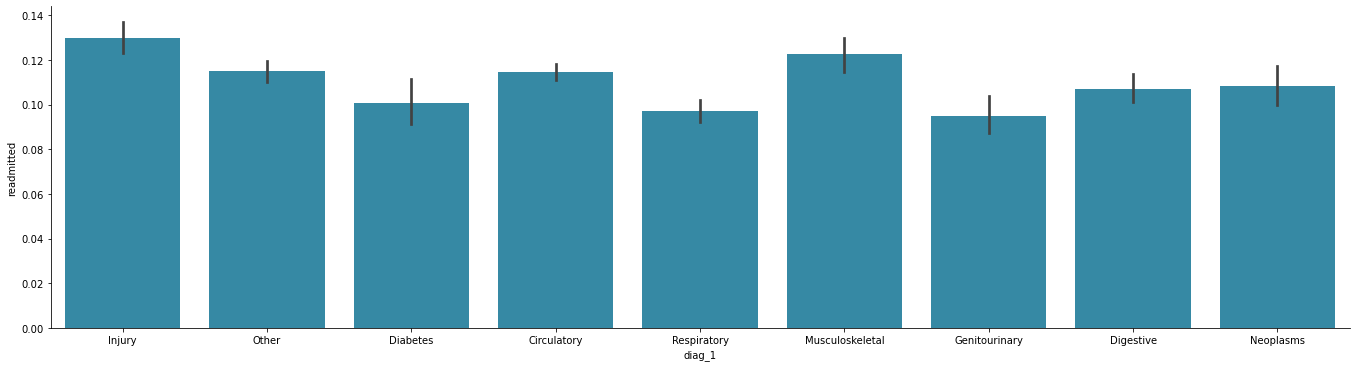

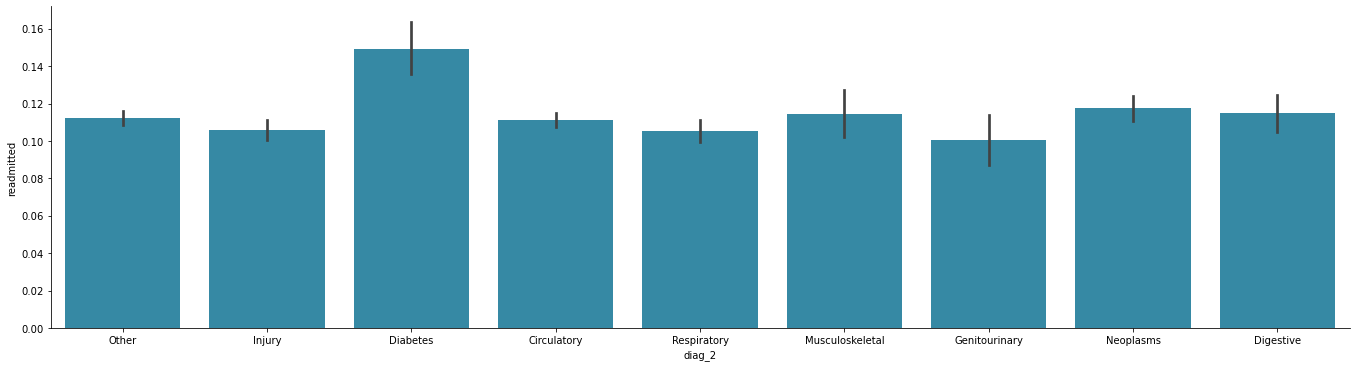

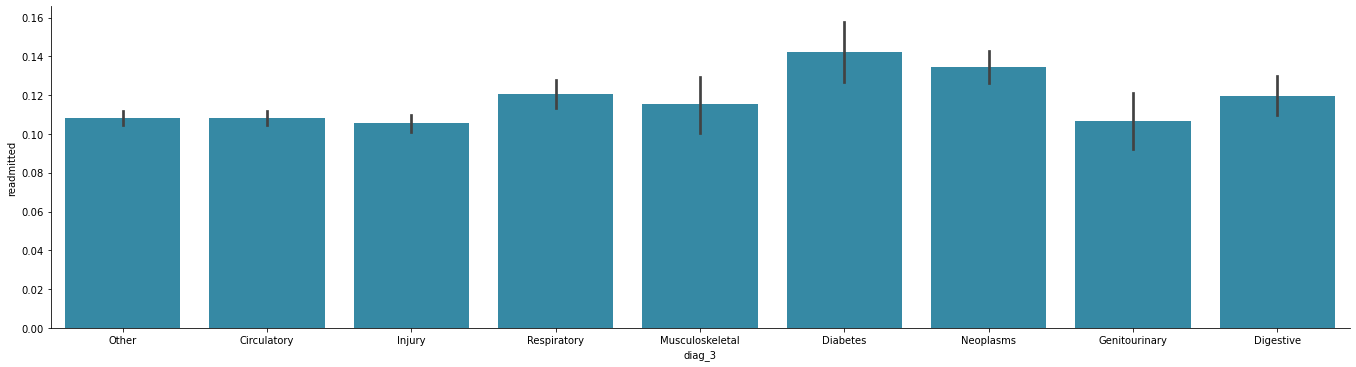

In [27]:
sns.catplot(x = 'diag_1', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
sns.catplot(x = 'diag_2', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
sns.catplot(x = 'diag_3', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
   

**_Dealing with Change variable_**

_Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “Ch” and “No”_

In [28]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df.rename(columns={"change": "medication_change"}, inplace=True)

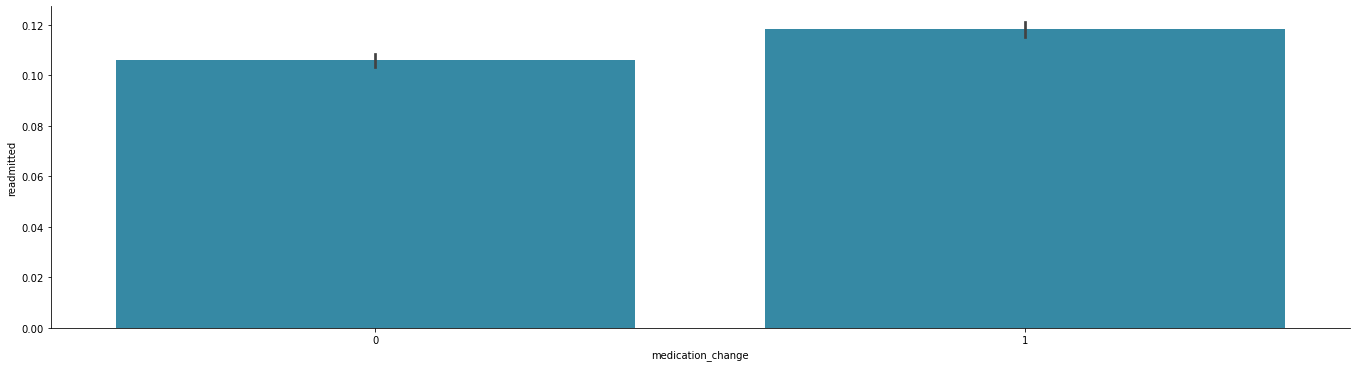

In [29]:
sns.catplot(x = 'medication_change', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])

**_Dealing with Features having [No, Up, Steady, Down] and [No, Steady] as values_**

_As [No] tell us that there was no change so will update it to 0 and if there was a change [Up, Down, steady] we will make it 1_

In [30]:
nosteadycols = list()
for i, d in unique_data.iterrows():
    if d['unique count'] < 5:
        val = d['unique values'].tolist()
        if ('No' in val) and ('Steady' in val) :
            nosteadycols.append(i)

In [31]:
def plot_cat(nrows, ncols, columns):
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols, figsize=(20,15))
    axs = axs.flatten()
    
    # delete unused plots
    total_plots = len(axs)
    unused = len(axs) - len(columns)
    if unused > 0:
        for a in range(len(columns), total_plots):
            fig.delaxes(axs[a])
    
    i = 0
    for col in columns:
        sns.barplot(x = col, y = "readmitted", data = df, ax=axs[i])
        i += 1

    plt.tight_layout()

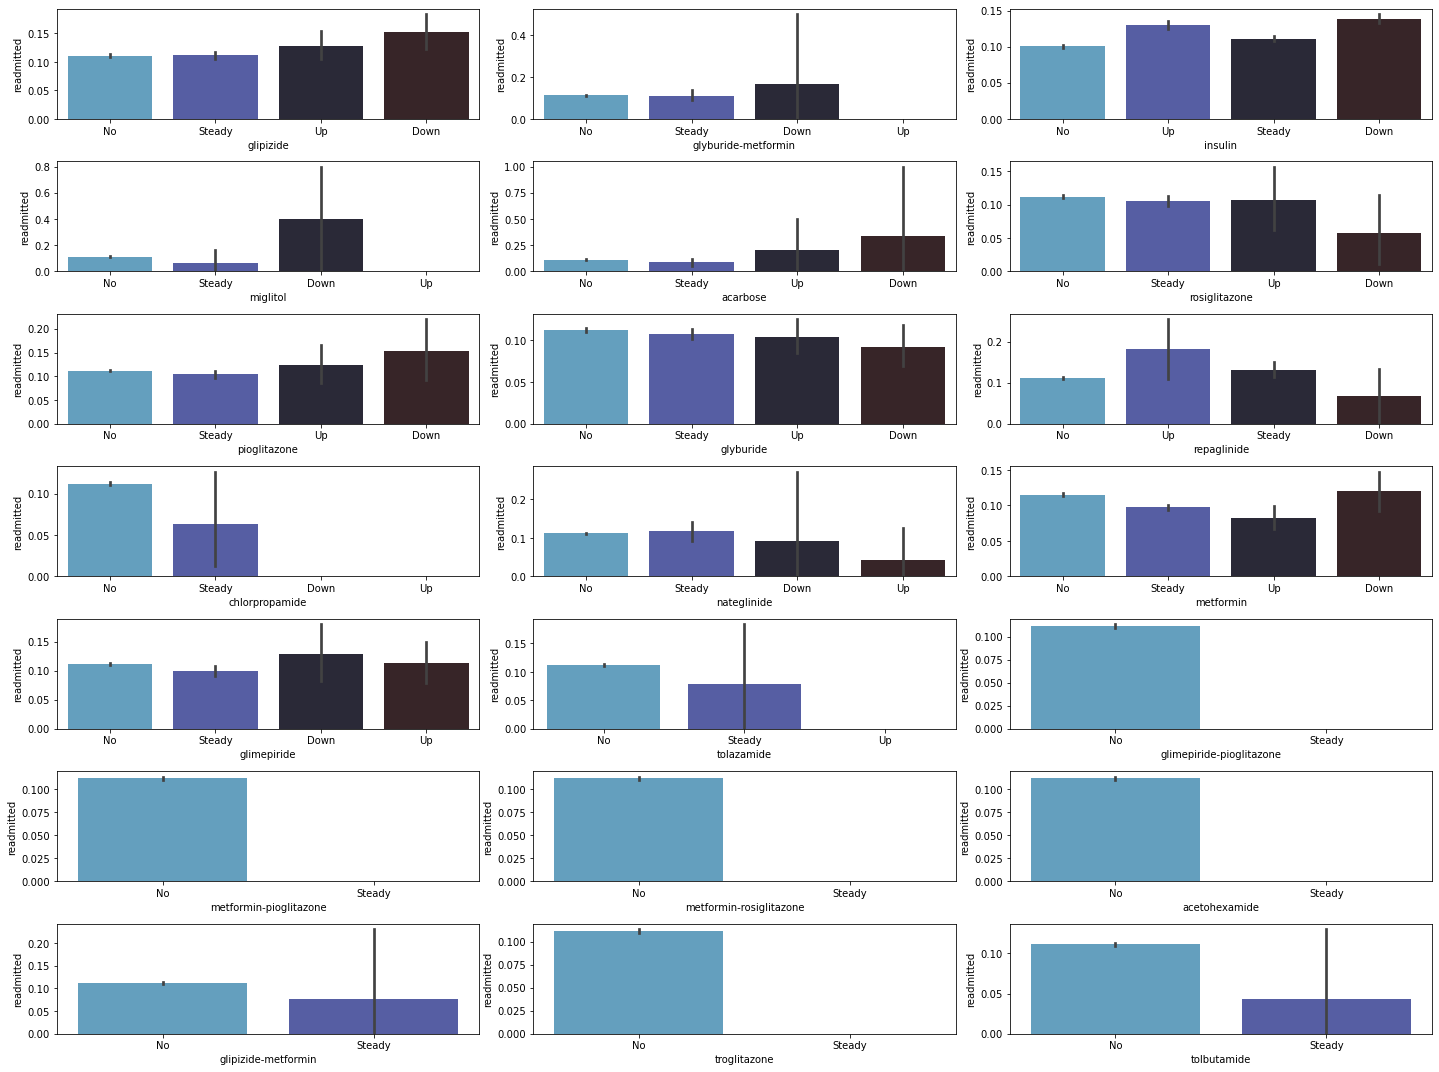

In [32]:
plot_cat(7,3,nosteadycols)

In [33]:
for col in nosteadycols:
    df[col] = df[col].replace(['No','Steady','Up','Down'],[0,1,1,1]).astype(int)

**_Converting diabetesMed to 0 and 1 from Yes and NO_**

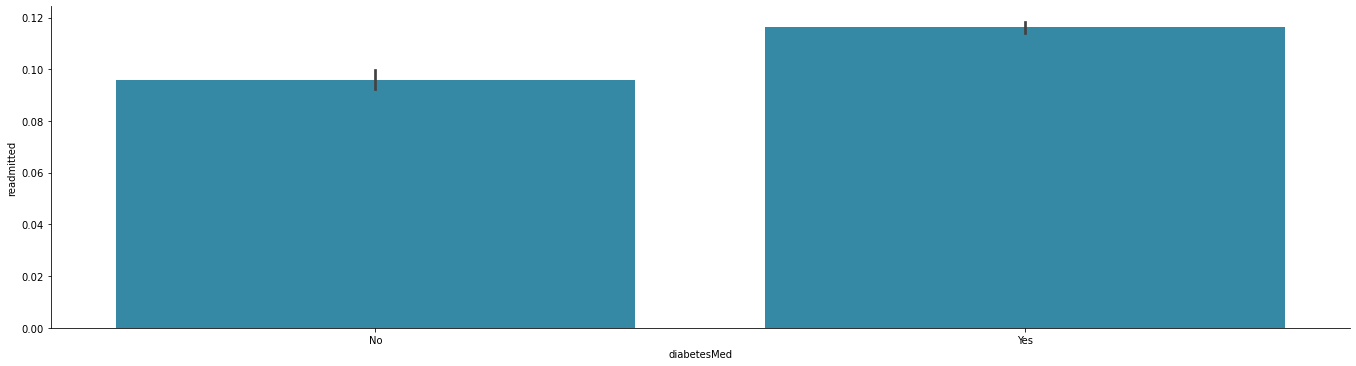

In [34]:
sns.catplot(x = 'diabetesMed', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])

In [35]:
df['diabetesMed'] = df['diabetesMed'].replace(['No','Yes'],[0,1]).astype(int)

**_Dealing With A1Cresult_**

_The normal A1C range is 4-6%. For people with diabetes, the lower the A1C value, the better the diabetes control and the lower the risk of developing complications. so we will convert it to 0 if none or normal else 1_

In [36]:
analysis_df = df[['diag_1', 'diag_2', 'diag_3','A1Cresult','readmitted']]

In [37]:
g_analysis_df = analysis_df.groupby(['diag_1', 'diag_2', 'diag_3', 'readmitted']).count()['A1Cresult']
g_analysis_df

diag_1       diag_2       diag_3       readmitted
Circulatory  Circulatory  Circulatory  0             6151
                                       1              691
                          Diabetes     0               94
                                       1                9
                          Digestive    0              168
                                                     ... 
Respiratory  Respiratory  Neoplasms    1               17
                          Other        0              687
                                       1               78
                          Respiratory  0              469
                                       1               48
Name: A1Cresult, Length: 1283, dtype: int64

In [38]:
diag_1 = analysis_df.diag_1.unique().tolist()
diag_2 = analysis_df.diag_2.unique().tolist()
diag_3 = analysis_df.diag_3.unique().tolist()

In [39]:
re_prob = dict()

for one in diag_1:
    for two in diag_2:
        for three in diag_3:
            readmission = analysis_df[(analysis_df['diag_1'] == one) & (analysis_df['diag_2'] == two) & (analysis_df['diag_3'] == three)]
            yes = readmission[readmission.readmitted == 1].shape[0]
            no = readmission[readmission.readmitted == 0].shape[0]
            typ = one+' - '+two+' - '+three
            prob = 0
            if (yes + no) > 0:
                prob = yes / (yes + no) * 100
            re_prob[typ] = prob

In [40]:
re_prob = sorted(re_prob.items(), key=lambda kv: kv[1], reverse=True)

In [41]:
re_prob = re_prob[:25]
re_prob = dict(re_prob)
re_prob

{'Other - Genitourinary - Diabetes': 100.0,
 'Circulatory - Musculoskeletal - Diabetes': 100.0,
 'Musculoskeletal - Musculoskeletal - Diabetes': 100.0,
 'Genitourinary - Diabetes - Digestive': 100.0,
 'Digestive - Musculoskeletal - Genitourinary': 100.0,
 'Neoplasms - Genitourinary - Diabetes': 100.0,
 'Injury - Injury - Respiratory': 50.0,
 'Circulatory - Genitourinary - Musculoskeletal': 50.0,
 'Circulatory - Genitourinary - Diabetes': 50.0,
 'Respiratory - Musculoskeletal - Injury': 50.0,
 'Respiratory - Musculoskeletal - Diabetes': 50.0,
 'Respiratory - Digestive - Musculoskeletal': 50.0,
 'Musculoskeletal - Diabetes - Digestive': 50.0,
 'Genitourinary - Other - Diabetes': 50.0,
 'Genitourinary - Diabetes - Genitourinary': 50.0,
 'Neoplasms - Respiratory - Genitourinary': 50.0,
 'Genitourinary - Neoplasms - Musculoskeletal': 40.0,
 'Other - Diabetes - Injury': 38.372093023255815,
 'Diabetes - Diabetes - Genitourinary': 37.5,
 'Circulatory - Digestive - Neoplasms': 37.5,
 'Injury - 

In [42]:
keys = re_prob.keys()
values = re_prob.values()

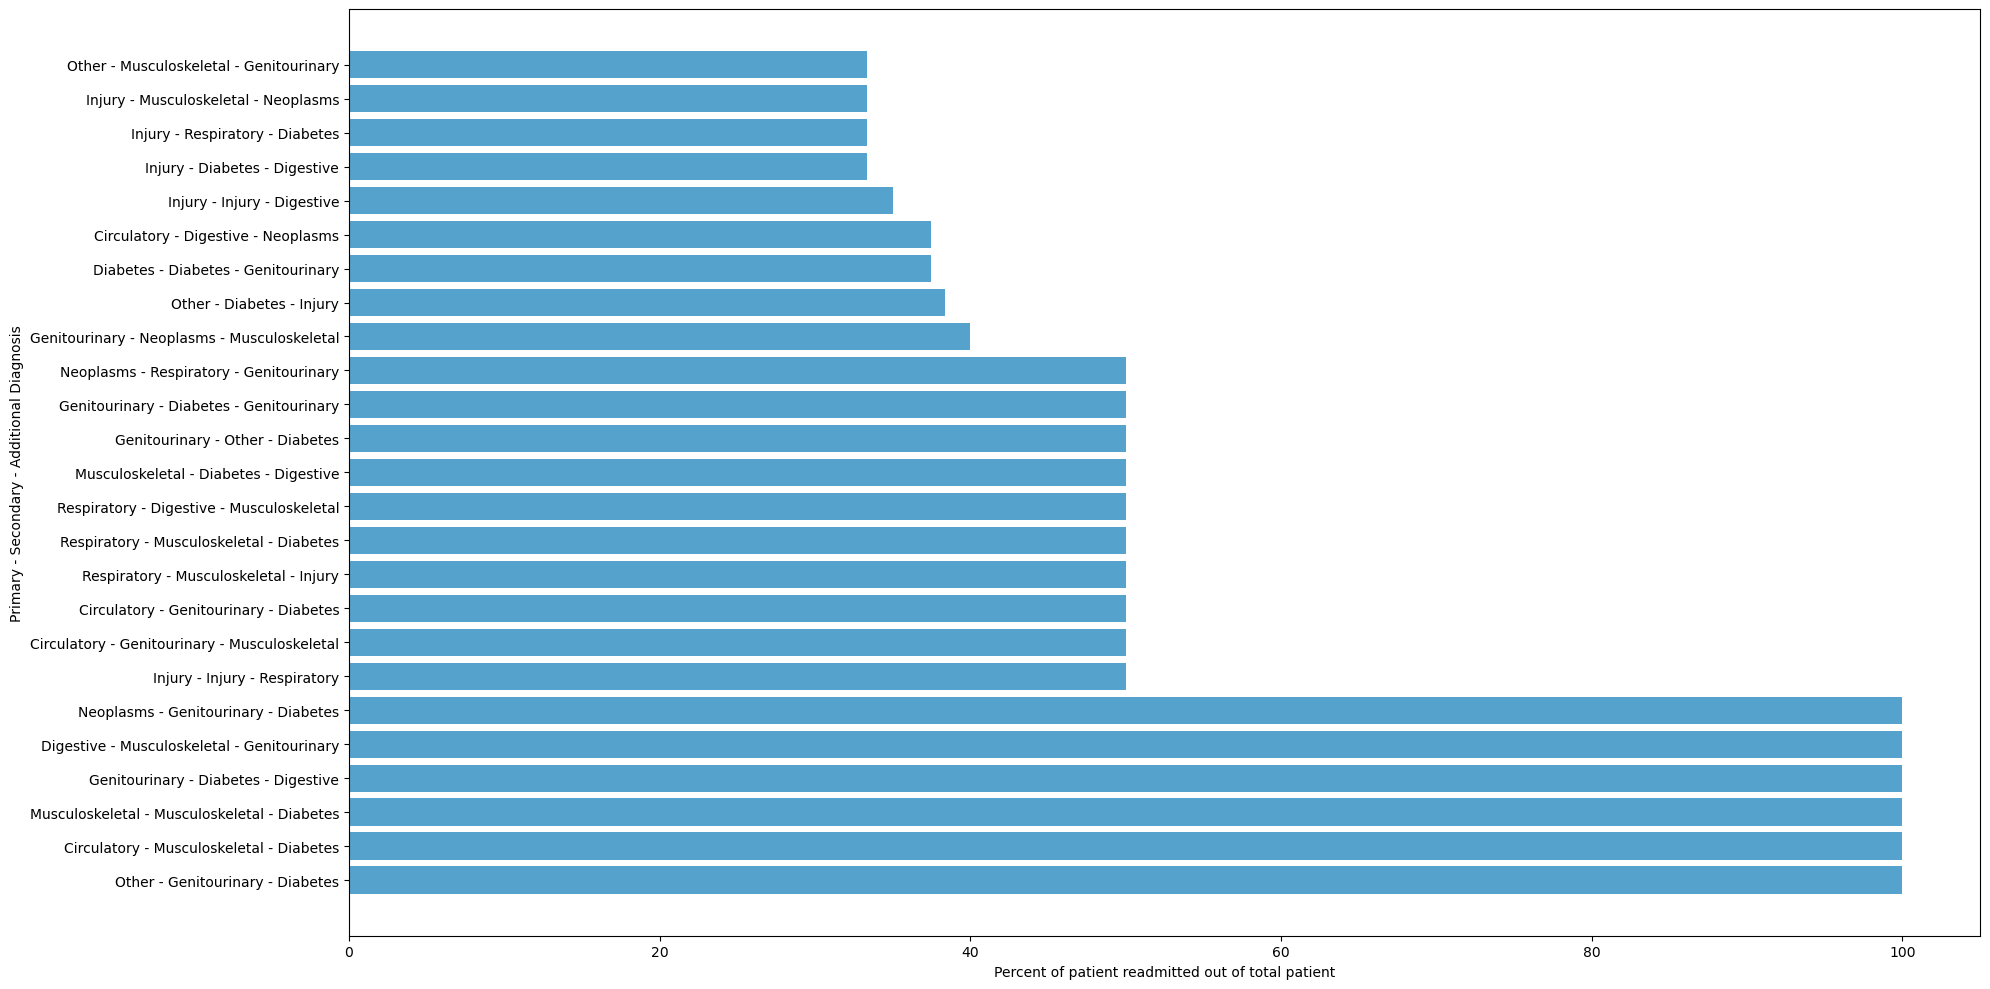

In [43]:
plt.figure(figsize=(20,10),dpi=100)
plt.barh(list(keys), values)
plt.xlabel('Percent of patient readmitted out of total patient')
plt.ylabel('Primary - Secondary - Additional Diagnosis')
plt.tight_layout()
#plt.savefig('images/diag.jpg')

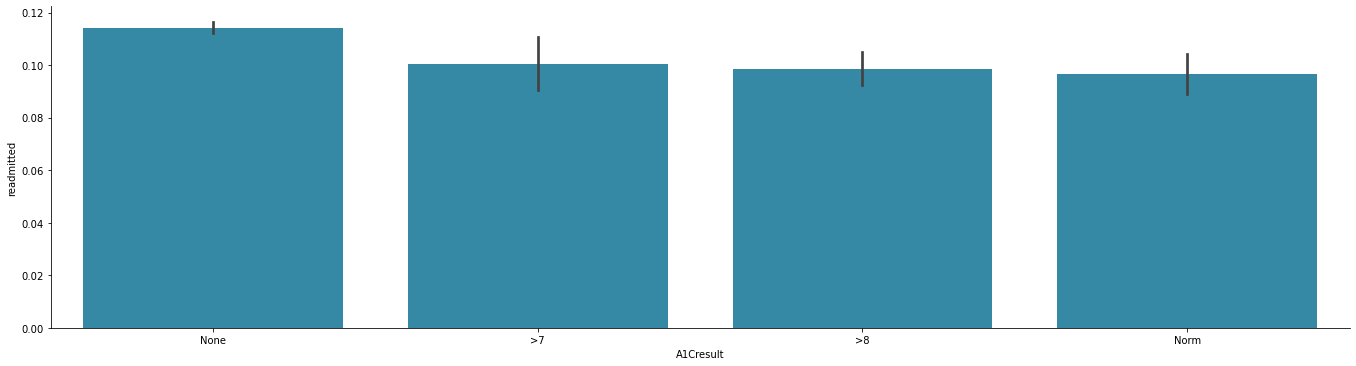

In [44]:
sns.catplot(x = 'A1Cresult', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])

In [45]:
df['A1Cresult'] = df['A1Cresult'].replace(['None', 'Norm', '>7', '>8'],[-99,0,1,1]).astype(int)

**_Dealing With max_glu_serum_**

_If the glucose level is below 100 it is normal and if it goes beyond 300 that indicates diabetes and values above 100 may also indicate pre-diabetes, level depends what you ate before the test_

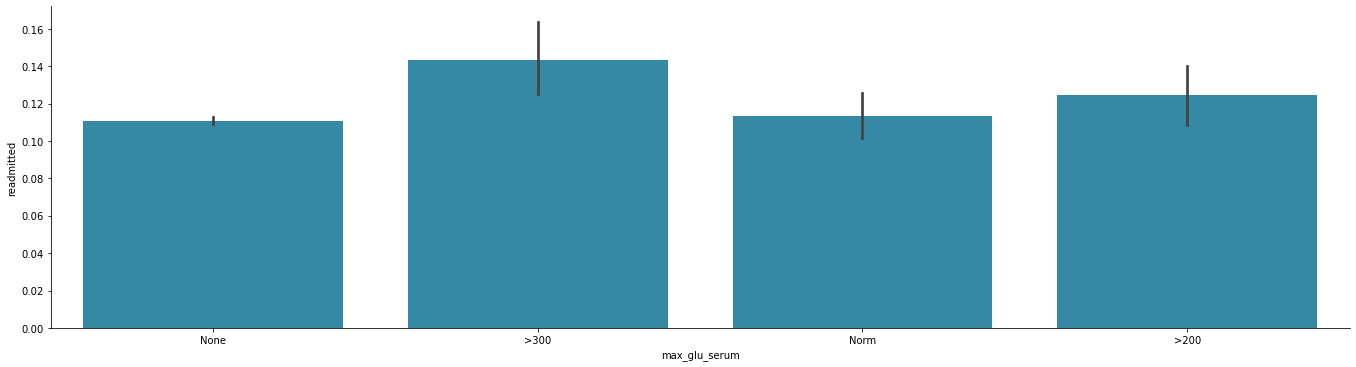

In [46]:
sns.catplot(x = 'max_glu_serum', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])

In [47]:
df['max_glu_serum'] = df['max_glu_serum'].replace(['None', 'Norm', '>300', '>200'],[-99,0,1,1]).astype(int)

### CATEGORY ENCODING 

**_one hot encoding on IDs category_**

In [48]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])] # as people who died are not going to readmitt.

In [49]:
# As discharge ID NaN are for those who died we must remove all those record as it is obvious that they won't be returning/readmitting
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(int)

In [50]:
# One hot Encoding Race and Id's 
one_hot_data = pd.get_dummies(df, columns=['race'])

columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

In [51]:
df = one_hot_data.copy()

**_ordinal encoding on features where order is important_**

In [52]:
# age values = [[0-10), [10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100)]
age_group = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5,  '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}
df['age'] = df.age.map(age_group)

In [53]:
from sklearn.preprocessing import LabelEncoder
for col in diag:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

_acetohexamide is left with just one category so we will drop the feature_

In [54]:
df.drop(columns='acetohexamide', axis=1, inplace=True)

In [55]:
df.readmitted.value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

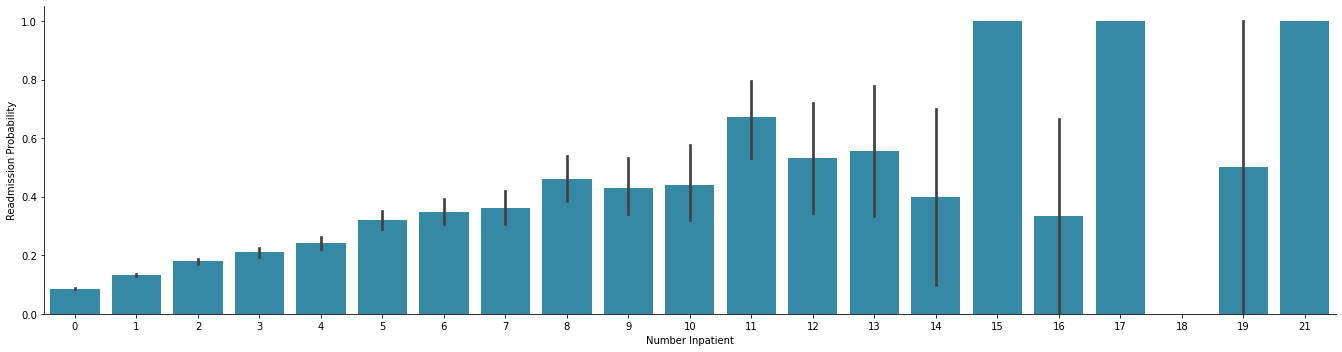

In [56]:
number_inpatient = sns.catplot(x = 'number_inpatient', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
number_inpatient.set_ylabels("Readmission Probability")
number_inpatient.set_xlabels("Number Inpatient")
plt.tight_layout()
#plt.savefig('images/number_inpatient.jpg')

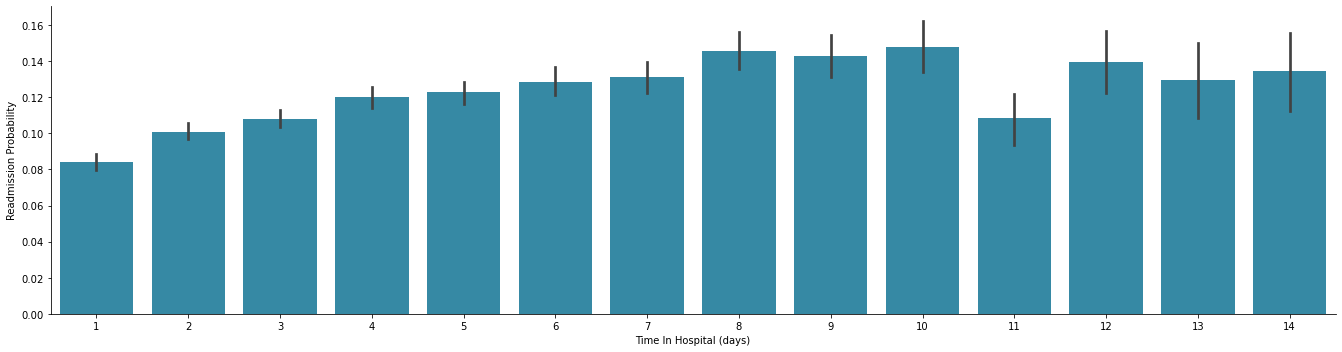

In [63]:
time_in_hospital = sns.catplot(x = 'time_in_hospital', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
time_in_hospital.set_ylabels("Readmission Probability")
time_in_hospital.set_xlabels("Time In Hospital (days)")
plt.tight_layout()
#plt.savefig('images/time_in_hospital.jpg')

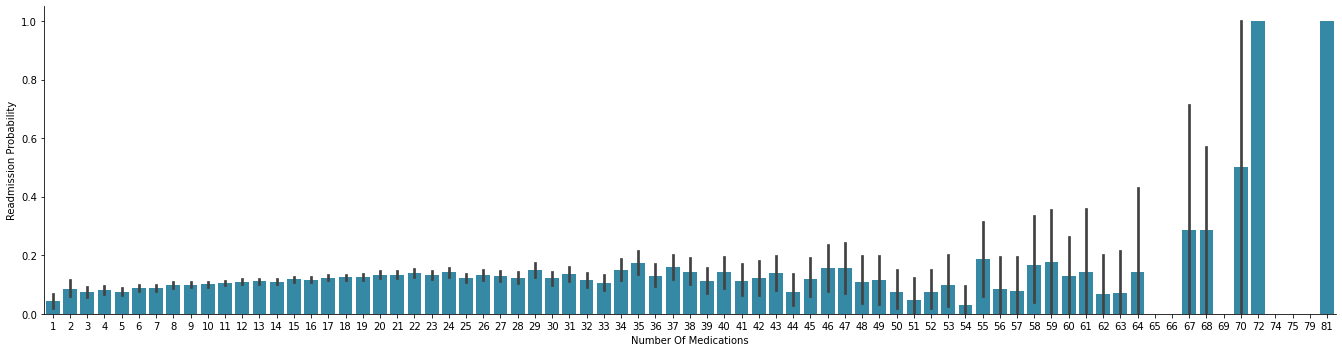

In [58]:
num_medications = sns.catplot(x = 'num_medications', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
num_medications.set_ylabels("Readmission Probability")
num_medications.set_xlabels("Number Of Medications")
plt.tight_layout()


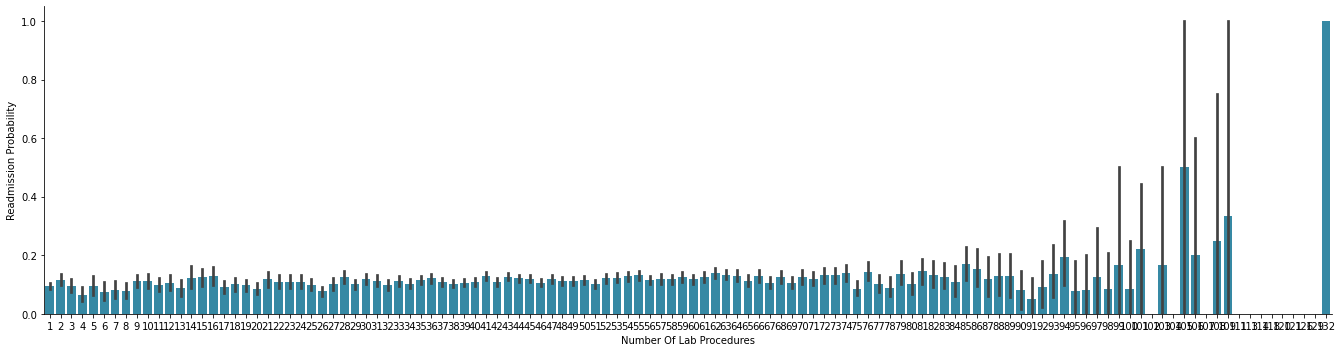

In [59]:
num_lab_procedures = sns.catplot(x = 'num_lab_procedures', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
num_lab_procedures.set_ylabels("Readmission Probability")
num_lab_procedures.set_xlabels("Number Of Lab Procedures")
plt.tight_layout()

In [61]:
df.shape

(99340, 89)

**_Save the cleaned Dataframe_**

In [ ]:
df.to_csv('datasets/readmission_cleaned.csv',index=False)